In [2]:
# Import Dependencies
import pandas as pd
import csv

import os
import numpy as np

import requests

from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [3]:
merged_df = pd.read_csv('data/NIHmergedwithCOVIDdata.csv', delimiter = ',')
merged_df.head()

,Unnamed: 0,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate
0,0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.0
1,1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.0
2,2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.0
3,3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.0
4,4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.0


In [4]:
season_df = merged_df.groupby(['Year', 'Month']).agg({'PerCapita': ['mean']})
# season_df = season_df.reset_index()
season_df.head()
# df_daily=df.groupby('date').agg(['sum'])



PerCapita
                mean
Year Month          
2017 1      0.057459
     2      0.056659
     3      0.066859
     4      0.066686
     5      0.071557

In [5]:
season_df.columns

MultiIndex([('PerCapita', 'mean')],
           )

In [6]:
for col in season_df:
    print(col)

('PerCapita', 'mean')


In [7]:
season_df.columns = ['PerCapita']
season_df.reset_index(inplace=True)

In [8]:

season_df["Year"].unique().tolist()

[2017, 2018, 2019, 2020]

In [9]:
for y in season_df["Year"].unique().tolist():
    season_df[y] = season_df.loc[ season_df["Year"]== y ,'PerCapita']

In [10]:
plot_df =season_df.copy(deep=True)

In [11]:
plot_df = plot_df.drop(columns=["Year","PerCapita"]).set_index("Month")

In [12]:
plot_df.columns

Index([2017, 2018, 2019, 2020], dtype='object')

In [13]:
final_plot_df = pd.DataFrame({ col: plot_df[col].dropna() for col in plot_df.columns})
final_plot_df.head()

,2017,2018,2019,2020
Month,,,,
1,0.057459,0.057291,0.061366,0.062484
2,0.056659,0.056209,0.055927,0.059198
3,0.066859,0.063961,0.063289,0.067464
4,0.066686,0.064827,0.068030,0.067205
5,0.071557,0.074345,0.073457,0.071232


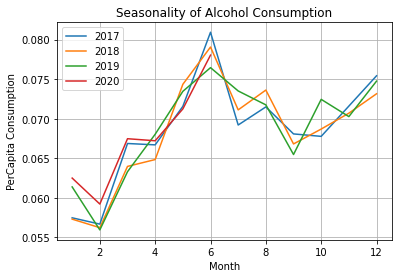

In [14]:
final_plot_df.plot()
plt.xlabel("Month")
plt.grid()
plt.ylabel("PerCapita Consumption")
plt.title("Seasonality of Alcohol Consumption")
plt.savefig("data/vis1season.png")


In [20]:
# import matplotlib.pyplot as plt
# #plt.plot(["PerCapita mean"])
# #plt.ylabel('PerCapita')
# season_df.plot(x="Month",y="PerCapita")


In [25]:
merged_df.head()

,Unnamed: 0,Year,Month,State,Beverage Type,Gallons,Ethanol,Population,PerCapita,PerCapita3yr,PctChange,index,positive,totalTestResults,Positivity Rate
0,0,2017,1,Alaska,Spirits,103645,42598,593378,0.0718,NaN,NaN,NaN,NaN,NaN,0.0
1,1,2017,1,Arkansas,Spirits,402885,165586,2455022,0.0674,NaN,NaN,NaN,NaN,NaN,0.0
2,2,2017,1,Colorado,Spirits,733857,301615,4634346,0.0651,NaN,NaN,NaN,NaN,NaN,0.0
3,3,2017,1,Connecticut,Spirits,412100,169373,3015481,0.0562,NaN,NaN,NaN,NaN,NaN,0.0
4,4,2017,1,Florida,Spirits,2770686,1138752,17722275,0.0643,NaN,NaN,NaN,NaN,NaN,0.0


In [47]:
bev_bar_df  = merged_df['PerCapita'].groupby([merged_df['Year'], merged_df['Beverage Type']]).mean()
bev_bar_df

Year  Beverage Type
2017  Beer             0.090188
      Spirits          0.080462
      Wine             0.036707
2018  Beer             0.088401
      Spirits          0.081422
      Wine             0.036455
2019  Beer             0.087805
      Spirits          0.084167
      Wine             0.035961
2020  Beer             0.083765
      Spirits          0.084339
      Wine             0.035041
Name: PerCapita, dtype: float64

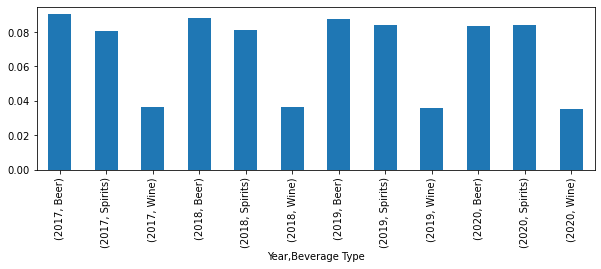

In [50]:
bev_bar_df.plot(kind='bar', figsize=(10,3))

In [53]:
bev_bar_df

Year  Beverage Type
2017  Beer             0.090188
      Spirits          0.080462
      Wine             0.036707
2018  Beer             0.088401
      Spirits          0.081422
      Wine             0.036455
2019  Beer             0.087805
      Spirits          0.084167
      Wine             0.035961
2020  Beer             0.083765
      Spirits          0.084339
      Wine             0.035041
Name: PerCapita, dtype: float64

In [134]:
# Turn the data into groups that can be made into a bar chart


In [135]:
groups = [[0.090188, 0.080462, 0.036707], 
          [0.088401, 0.081422, 0.036455], 
          [0.087805, 0.084167, 0.035961],
          [0.083765, 0.084339, 0.035041]]
group_labels = ['2017', '2018', '2019', '2020']
group_legend = ['Beer', 'Spirits', 'Wine']


# Convert data to pandas DataFrame.
bar_df = pd.DataFrame(groups, index=group_labels).T

bar_df.head()


,2017,2018,2019,2020
0,0.090188,0.088401,0.087805,0.083765
1,0.080462,0.081422,0.084167,0.084339
2,0.036707,0.036455,0.035961,0.035041


In [136]:
bar_df['Beverage'] = group_legend
bar_df

,2017,2018,2019,2020,Beverage
0,0.090188,0.088401,0.087805,0.083765,Beer
1,0.080462,0.081422,0.084167,0.084339,Spirits
2,0.036707,0.036455,0.035961,0.035041,Wine


In [137]:
bar_df.set_index('Beverage')

,2017,2018,2019,2020
Beverage,,,,
Beer,0.090188,0.088401,0.087805,0.083765
Spirits,0.080462,0.081422,0.084167,0.084339
Wine,0.036707,0.036455,0.035961,0.035041


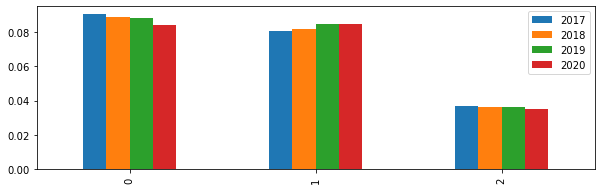

In [138]:
# This worked, just need to do it again, switch year and beverage

bar_df.plot(kind='bar', figsize=(10,3))

In [139]:
bev_bar_df

Year  Beverage Type
2017  Beer             0.090188
      Spirits          0.080462
      Wine             0.036707
2018  Beer             0.088401
      Spirits          0.081422
      Wine             0.036455
2019  Beer             0.087805
      Spirits          0.084167
      Wine             0.035961
2020  Beer             0.083765
      Spirits          0.084339
      Wine             0.035041
Name: PerCapita, dtype: float64

In [141]:
#This will make x axis year and beverage the legend

groups = [[0.090188, 0.088401, 0.087805, 0.083765], 
          [0.080462, 0.081422, 0.084167, 0.084339], 
          [0.036707, 0.036455, 0.035961, 0.035041]]
group_legend = ['2017', '2018', '2019', '2020']
group_labels = ['Beer', 'Spirits', 'Wine']


# Convert data to pandas DataFrame.
bar2_df = pd.DataFrame(groups, index=group_labels).T

bar2_df.head()

,Beer,Spirits,Wine
0,0.090188,0.080462,0.036707
1,0.088401,0.081422,0.036455
2,0.087805,0.084167,0.035961
3,0.083765,0.084339,0.035041


In [142]:
bar2_df['Year'] = group_legend
bar2_df

,Beer,Spirits,Wine,Year
0,0.090188,0.080462,0.036707,2017
1,0.088401,0.081422,0.036455,2018
2,0.087805,0.084167,0.035961,2019
3,0.083765,0.084339,0.035041,2020


In [143]:
bar2_df = bar2_df.set_index('Year')

In [144]:
bar2_df

,Beer,Spirits,Wine
Year,,,
2017,0.090188,0.080462,0.036707
2018,0.088401,0.081422,0.036455
2019,0.087805,0.084167,0.035961
2020,0.083765,0.084339,0.035041


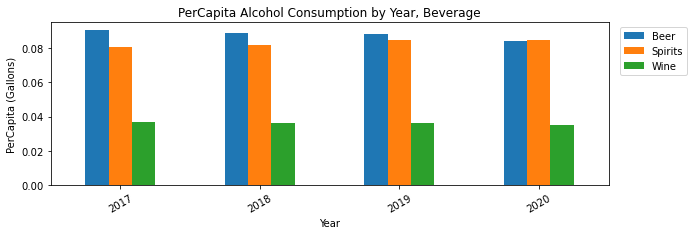

In [156]:


bar2_df.plot(kind='bar', figsize=(10,3), align="center")
plt.title("PerCapita Alcohol Consumption by Year, Beverage")
plt.xlabel("Year")
plt.ylabel("PerCapita (Gallons)")
plt.xticks(rotation=30, horizontalalignment="center")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

plt.savefig("data/vis2beverage.png")